In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from IPython.display import Image


In [19]:
df = pd.read_csv("glass identification second (2).csv")
df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [21]:
del df[df.columns[0]]
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Text(0, 0.5, 'Fe')

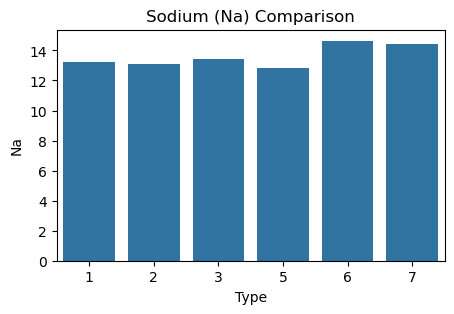

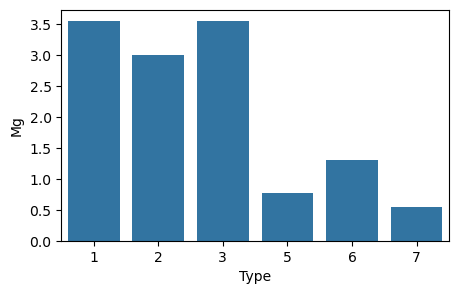

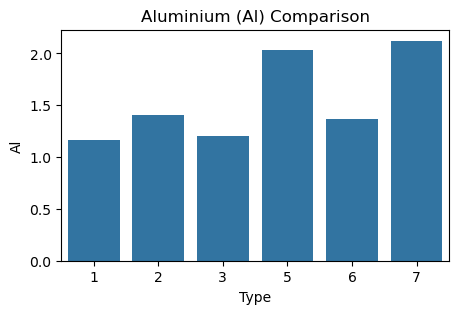

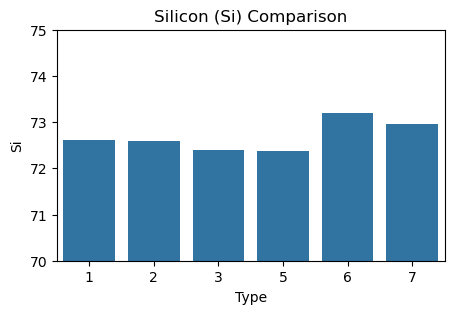

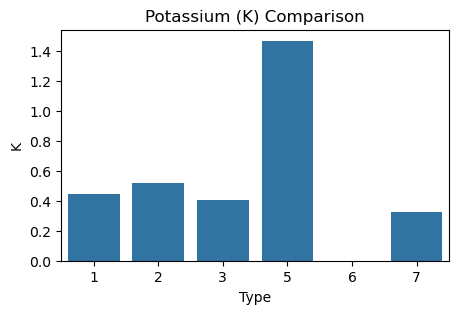

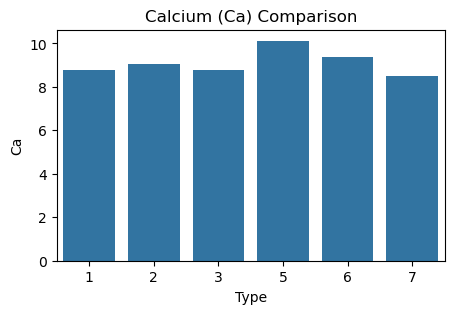

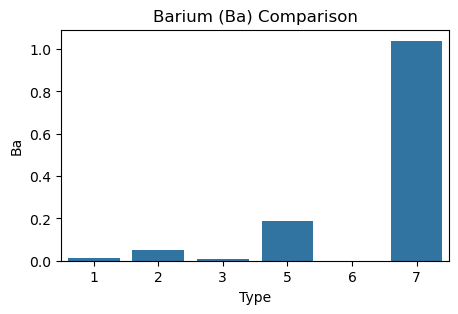

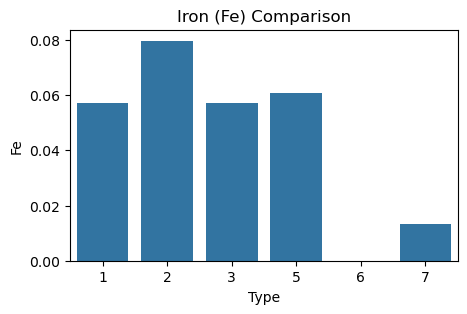

In [25]:

plt.figure(figsize=(5,3))

plt.title("Sodium (Na) Comparison")

sns.barplot(x=df['Type'], y=df['Na'], errorbar=None)

plt.ylabel("Na")


plt.figure(figsize=(5,3))

sns.barplot(x=df['Type'], y=df['Mg'], errorbar=None)

plt.ylabel("Mg")


plt.figure(figsize=(5,3))

plt.title("Aluminium (Al) Comparison")

sns.barplot(x=df['Type'], y=df['Al'], errorbar=None)

plt.ylabel("Al")


plt.figure(figsize=(5,3))

plt.title("Silicon (Si) Comparison")

sns.barplot(x=df['Type'], y=df['Si'], errorbar=None)

plt.ylabel("Si")

plt.ylim(70, 75)

plt.figure(figsize=(5,3))

plt.title("Potassium (K) Comparison")

sns.barplot(x=df['Type'], y=df['K'], errorbar=None)

plt.ylabel("K")

plt.figure(figsize=(5,3))

plt.title("Calcium (Ca) Comparison")

sns.barplot(x=df['Type'], y=df['Ca'], errorbar=None)

plt.ylabel("Ca")


plt.figure(figsize=(5,3))

plt.title("Barium (Ba) Comparison")

sns.barplot(x=df['Type'], y=df['Ba'], errorbar=None)

plt.ylabel("Ba")

plt.figure(figsize=(5,3))

plt.title("Iron (Fe) Comparison")

sns.barplot(x=df['Type'], y=df['Fe'], errorbar=None)

plt.ylabel("Fe")

In [26]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)

    return result

In [29]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [31]:
label = df['Type'] 

In [33]:
del df['Type']

In [35]:
df = normalize(df) 

In [37]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


In [39]:
df['Type'] = label 

In [41]:
df.head() 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0,1


In [43]:
 df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [45]:
label = df['Type'] 
del df['Type'] 

In [47]:
df.head(1) 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.0,0.252336,0.351786,0.009662,0.30855,0.0,0.0


<Axes: >

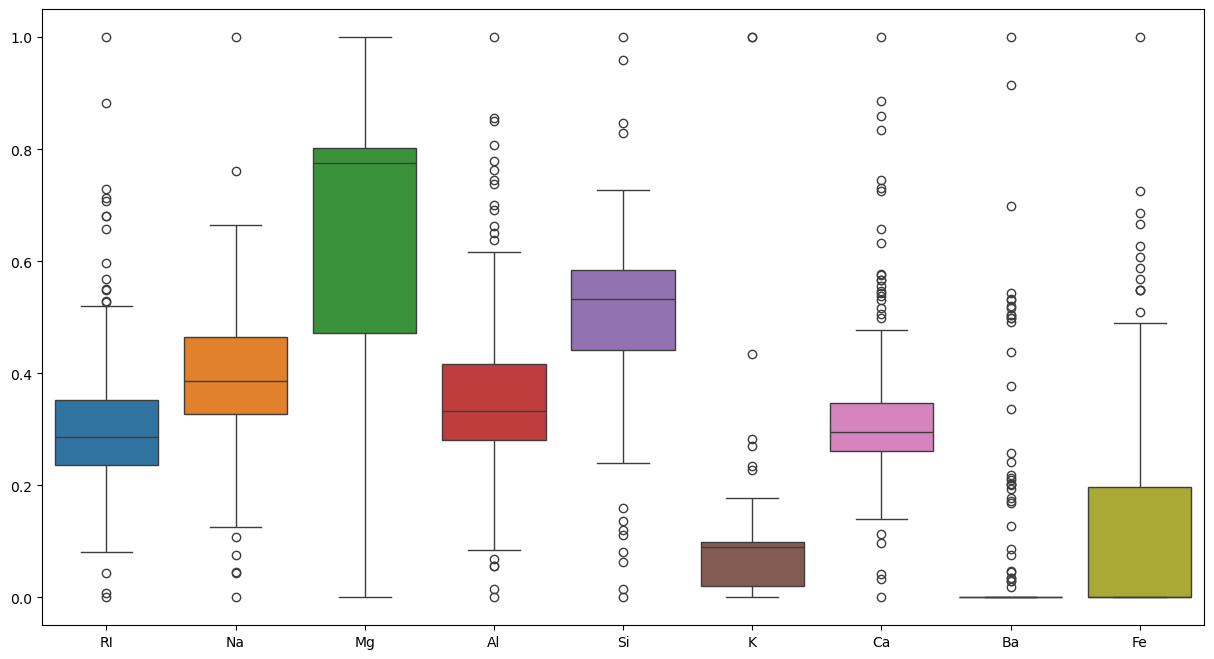

In [49]:
fig = plt.figure(figsize=(15,8)) 
sns.boxplot(data=df) 

In [50]:
df['Type'] = label

In [53]:
df.head(1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.0,0.252336,0.351786,0.009662,0.30855,0.0,0.0,1


In [55]:
from scipy import stats
df = df[(np.abs(stats.zscore(df))<3).all(axis=1)]

In [57]:
len(df)

194

In [59]:
y = df['Type']
del df['Type']

In [61]:
X = df
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
208,0.230465,0.547368,0.000000,0.763240,0.542857,0.000000,0.373606,0.171429,0.0
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [65]:

import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
y_pred = rf.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8974358974358975


In [71]:
y_pred


array([6, 2, 2, 6, 2, 2, 6, 2, 3, 5, 1, 1, 3, 1, 2, 7, 1, 1, 2, 2, 2, 1,
       7, 2, 1, 2, 7, 7, 2, 7, 2, 1, 2, 2, 2, 2, 6, 1, 1])

In [81]:
cm = confusion_matrix(y_test, y_pred)

Text(95.72222222222221, 0.5, 'y_test (Truth)')

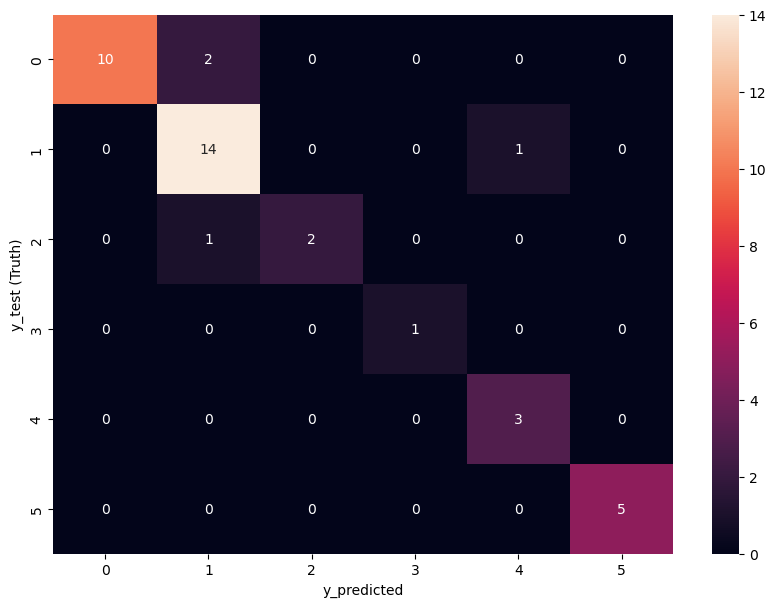

In [83]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('y_predicted')
plt.ylabel('y_test (Truth)')

In [85]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

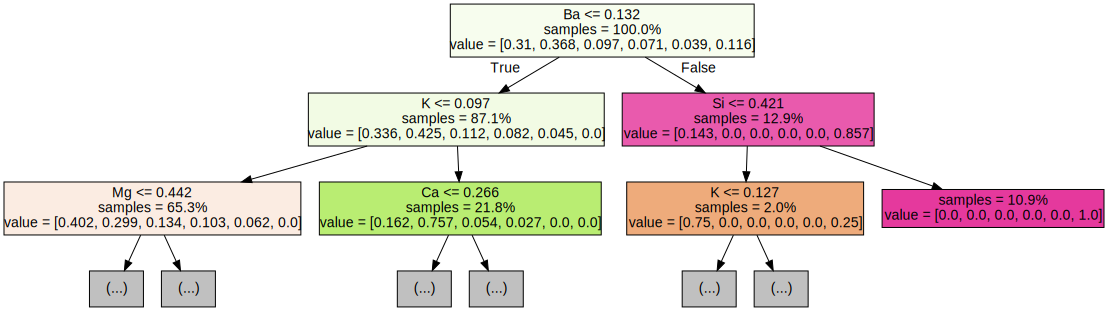

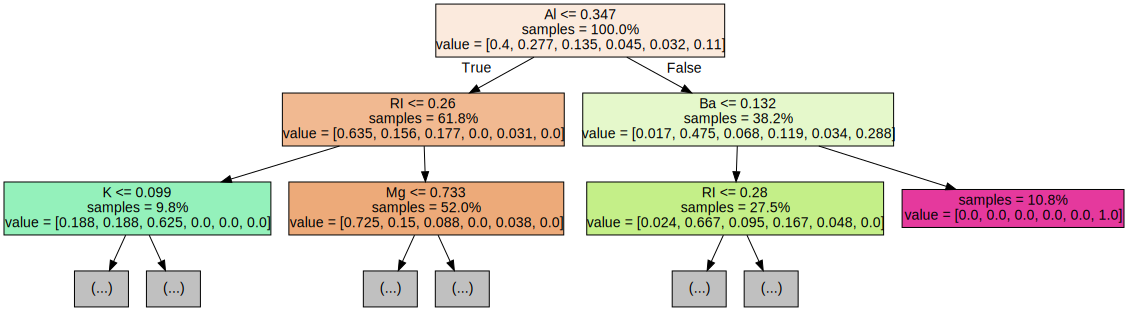

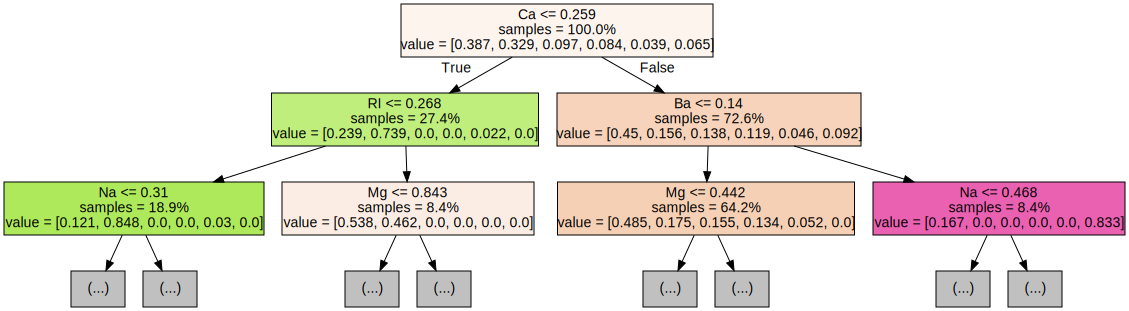

In [41]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [42]:
# OUTPUT OF DATA
rf.predict([[0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0]])

array([7], dtype=int64)

In [43]:
rf.predict([[0.28358,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0]])

array([1], dtype=int64)